# MobileNetV2で欅坂46とけやき坂46のメンバーの顔認識

In [1]:
import keras
from keras.applications.mobilenetv2 import MobileNetV2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from utils.utils import load_data

%matplotlib inline

/home/ishiyama/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### モデルと学習の設定

In [2]:
# モデルの設定
NUMBER_OF_MEMBERS = 41             # 漢字とひらがな合わせたメンバー数
CLASSES = NUMBER_OF_MEMBERS + 1    # one hot表現は0から始まるため

# 学習の設定
EPOCHS = 5
TEST_SIZE = 0.3
VALIDATION_SPLIT = 0.3

### データの読み込み

In [3]:
X, Y = load_data('/home/ishiyama/notebooks/keyakizaka_member_detection/image/mobilenet/')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, shuffle=True)

### モデル構築

In [4]:
model = MobileNetV2(include_top=True, weights=None, classes=CLASSES)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 学習させる

In [5]:
fit_result = model.fit(
    x=X_train,
    y=Y_train,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    verbose=2
)

Train on 6259 samples, validate on 2683 samples
Epoch 1/5
 - 47s - loss: 3.7680 - acc: 0.0516 - val_loss: 12.3761 - val_acc: 0.0332
Epoch 2/5
 - 40s - loss: 3.3446 - acc: 0.1289 - val_loss: 11.3276 - val_acc: 0.0265
Epoch 3/5
 - 40s - loss: 3.0333 - acc: 0.1997 - val_loss: 11.0098 - val_acc: 0.0622
Epoch 4/5
 - 40s - loss: 2.7597 - acc: 0.2542 - val_loss: 12.6356 - val_acc: 0.0384
Epoch 5/5
 - 40s - loss: 2.4823 - acc: 0.3215 - val_loss: 13.7213 - val_acc: 0.0499


### LossとAccuracyのグラフを表示する
（参考）[MNISTでハイパーパラメータをいじってloss/accuracyグラフを見てみる](https://qiita.com/hiroyuki827/items/213146d551a6e2227810)

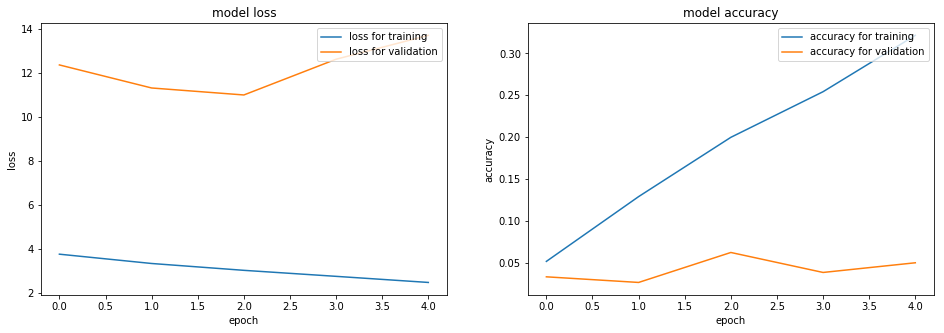

In [6]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(16,5))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="accuracy for training")
    axR.plot(fit.history['val_acc'],label="accuracy for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

plot_history_loss(fit_result)
plot_history_acc(fit_result)
plt.show()
plt.close()

### テストデータで精度を確認する

In [7]:
test_result = model.evaluate(
    x=X_test,
    y=Y_test
)
print('loss for test:', test_result[0])
print('accuracy for test:', test_result[1])

3833/3833 [==============================] - 5s 1ms/step
loss for test: 13.67530996520184
accuracy for test: 0.05243934254569482


### 今回学習したモデルを保存する

In [8]:
model.save('keyakizaka_member_detection_mobilenetv2.h5')